# save 1 year data

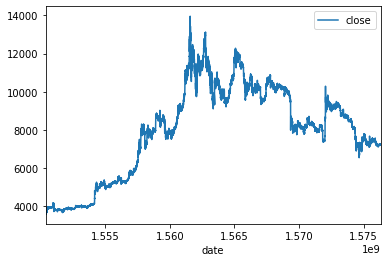

In [1]:
import poloniex
import pandas as pd
import time

polo = poloniex.Poloniex()
df_list=[]
n = 3

for j in range(n):
    i = n-j-1
    chart_data = polo.returnChartData('USDT_BTC', period=300, start=time.time()-polo.DAY*(i+1)*100, end=time.time()-polo.DAY*i*100)
    df_list.append(pd.DataFrame(chart_data))

df = pd.concat(df_list)

data = df.astype("float32")
data.plot(x='date', y='close')

data.to_pickle('1year_data.pkl')

# 高速フーリエ変換して強度みる

Text(0, 0.5, 'amplitude')

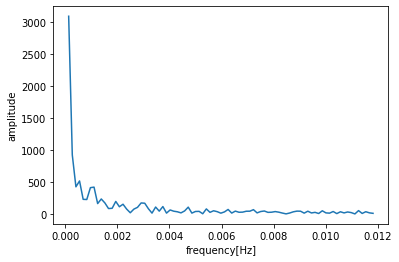

In [12]:
from scipy.fftpack import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

pd = data['close']
N = len(pd)
dt = 1.0/12 #[h]

# 離散フーリエ変換+正規化
yf = fft(pd)/(N/2)

freq = fftfreq(N, dt)

plt.plot(freq[1:int(N/1000)], np.abs(yf)[1:int(N/1000)])
plt.axis('tight')
plt.xlabel("frequency[Hz]")
plt.ylabel("amplitude")

[0.00041667 0.00055556 0.00069444 0.00083333 0.00097222 0.00111111
 0.00125    0.00138889 0.00152778 0.00166667 0.00180556 0.00194444
 0.00208333 0.00222222 0.00236111 0.0025     0.00263889 0.00277778
 0.00291667 0.00305556 0.00319444 0.00333333 0.00347222 0.00361111
 0.00375    0.00388889 0.00402778 0.00416667 0.00430556 0.00444444
 0.00458333 0.00472222 0.00486111 0.005      0.00513889 0.00527778
 0.00541667 0.00555556 0.00569444 0.00583333 0.00597222 0.00611111
 0.00625    0.00638889 0.00652778 0.00666667 0.00680556 0.00694444
 0.00708333 0.00722222 0.00736111 0.0075     0.00763889 0.00777778
 0.00791667 0.00805556 0.00819444 0.00833333 0.00847222 0.00861111
 0.00875    0.00888889 0.00902778 0.00916667 0.00930556 0.00944444
 0.00958333 0.00972222 0.00986111 0.01       0.01013889 0.01027778
 0.01041667 0.01055556 0.01069444 0.01083333 0.01097222 0.01111111
 0.01125    0.01138889 0.01152778 0.01166667 0.01180556]


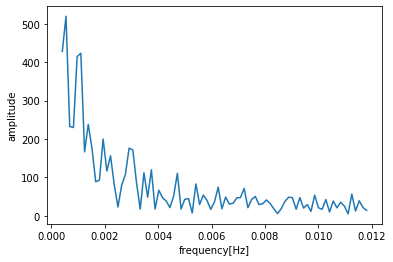

In [14]:
plt.plot(freq[3:int(N/1000)], np.abs(yf)[3:int(N/1000)])
plt.axis('tight')
plt.xlabel("frequency[Hz]")
plt.ylabel("amplitude")
print(freq[3:int(N/1000)])